##**Data Loading And Preprocessing**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
 data = pd.read_csv('amazon.csv')

In [57]:
data.head()

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [59]:
data.shape

(19996, 2)

In [60]:
data.isnull().sum()

,0
Text,0
label,0


In [61]:
# we have only one null value record is there we will remove that
data.dropna(inplace=True)

In [62]:
data.isnull().sum()

,0
Text,0
label,0


In [63]:
count=data.groupby('label').count()
count

,Text
label,
0,4766
1,15230


([<matplotlib.patches.Wedge at 0x7f2cb0454400>,
 [Text(-0.8057635102908705, 0.7488291964685502, 'positive'),
  Text(0.8057635453460941, -0.7488291587480372, 'nagative')],
 [Text(-0.4395073692495656, 0.4084522889828455, '76.2%'),
  Text(0.4395073883705967, -0.40845226840802024, '23.8%')])

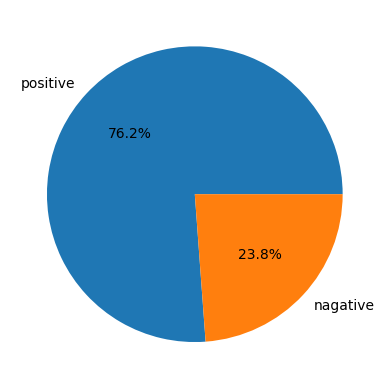

In [64]:
plt.pie(data['label'].value_counts(),labels=['positive','nagative'],autopct='%1.1f%%')

We have the positive reviews higher then the negative reviews. where as positive is 79.6% and negative reviews are 20.4% of the dataset.

<Axes: ylabel='Frequency'>

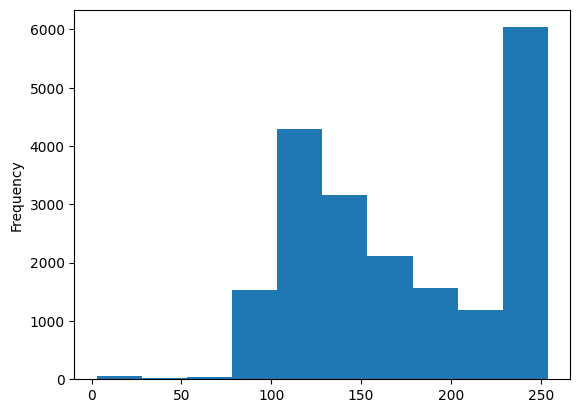

In [65]:
data.Text.str.len().plot(kind='hist')

nearly 1200-1400 records are having the large text compared to other records

<Axes: title={'center': 'Negative text'}, ylabel='Frequency'>

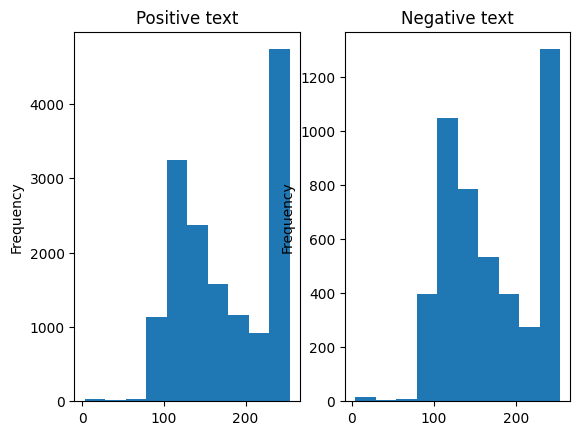

In [66]:
ax1=plt.subplot(1,2,1)
ax2=plt.subplot(1,2,2)
data['Text'][data['label']==1].str.len().plot(kind='hist',title='Positive text',ax=ax1)
data['Text'][data['label']==0].str.len().plot(kind='hist',title='Negative text',ax=ax2)

positive text is having little more words,length

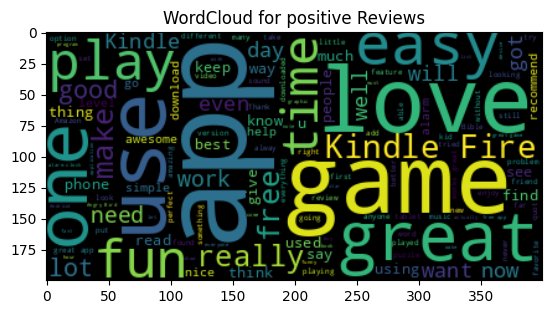

In [67]:
# will create word cloud for Positive reviews
from wordcloud import WordCloud
from wordcloud import WordCloud
msg= ' '.join(data[data['label']==1.0]['Text'])
np.positive_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for positive Reviews')
plt.imshow(np.positive_wc,interpolation='bilinear')
plt.show()

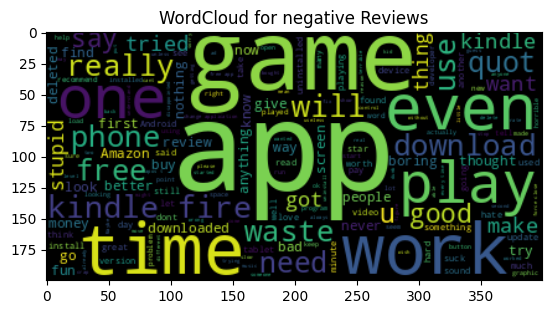

In [68]:
# will generate word cloud for negative reviews
msg= ' '.join(data[data['label']==0.0]['Text'])
np.negative_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for negative Reviews')
plt.imshow(np.negative_wc,interpolation='bilinear')
plt.show()

##**Text Preprocessing**##

In [69]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
def cleaning(text):
# converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub(r"\b\d+\b", " ", text) # removing number
    text = re.sub('<.*?>+', '', text) # removing special characters,
   #remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

# remove emjoi pattern

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
# remove all short forms of lexical language
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    return text

In [71]:
data['Text']=data['Text'].apply(lambda x:cleaning(x))

In [72]:
data.head()

,Text,label
0,this is the best apps acording to a bunch of ...,1
1,this is a pretty good version of the game for ...,1
2,this is a really there are a bunch of levels ...,1
3,this is a silly game and can be frustrating bu...,1
4,this is a terrific game on any pad hrs of fun ...,1


In [73]:
from collections import Counter
cnt=Counter()
for text in data['Text'].values:
    for word in text.split():
        cnt[word]+=1
cnt.most_common(10)

temp=pd.DataFrame(cnt.most_common(10),columns=['word','count'])
temp

,word,count
0,i,26286
1,the,23584
2,it,22066
3,to,20399
4,and,18605
5,this,17499
6,a,14915
7,is,13212
8,app,10657
9,my,9122


<BarContainer object of 10 artists>

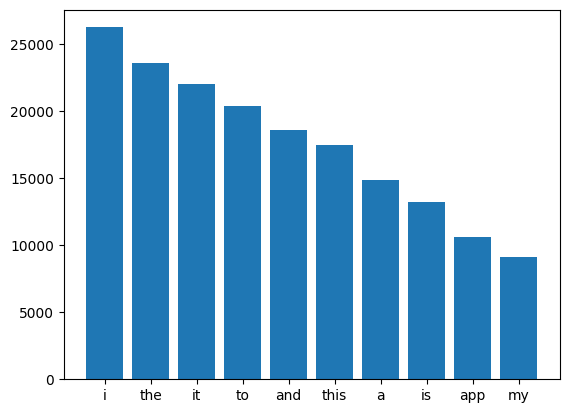

In [74]:
plt.bar(temp['word'],temp['count'])

we can see that these are the most used top 10 words in their reviews

In [75]:
# we will remove frequently used words
freq_words = set([w for (w, wc) in cnt.most_common(20)])
def remove_freq_words(text):
    return " ".join([word for word in str(text).split() if word not in (freq_words)])

In [76]:
data['Text']=data['Text'].apply(lambda x:remove_freq_words(x))

In [77]:
data.head()

,Text,label
0,best apps acording bunch people agree has bomb...,1
1,pretty good version being free there are lots ...,1
2,really there are bunch levels can find golden ...,1
3,silly can be frustrating lots fun definitely r...,1
4,terrific any pad hrs fun grandkids love great ...,1


In [78]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lm=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
#lementization
data['Text']=data['Text'].apply(lambda x:wordnet_lm.lemmatize(x))

In [80]:
data.head()

,Text,label
0,best apps acording bunch people agree has bomb...,1
1,pretty good version being free there are lots ...,1
2,really there are bunch levels can find golden ...,1
3,silly can be frustrating lots fun definitely r...,1
4,terrific any pad hrs fun grandkids love great ...,1


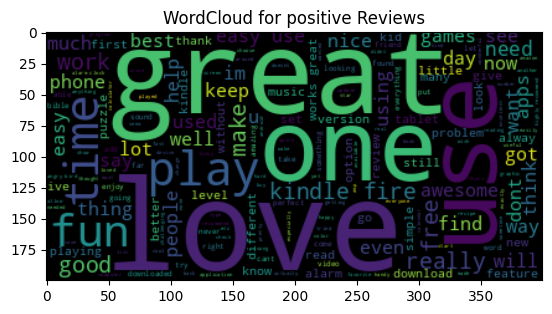

In [81]:
# now we will create word cloud for positive reviews and Negative reviews
msg=' '.join(data[data['label']==1.0]['Text'])
np.positive_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for positive Reviews')
plt.imshow(np.positive_wc,interpolation='bilinear')
plt.show()

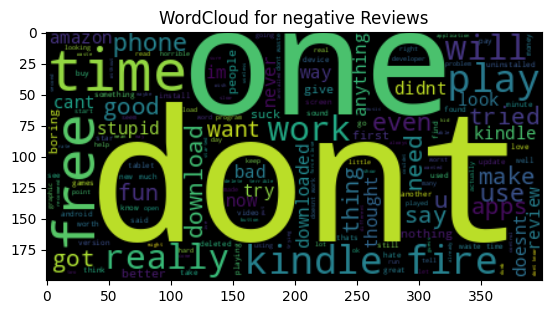

In [82]:
msg=' '.join(data[data['label']==0.0]['Text'])
np.negative_wc=WordCloud(background_color='black').generate(msg)
plt.title('WordCloud for negative Reviews')
plt.imshow(np.negative_wc,interpolation='bilinear')
plt.show()

In [83]:
token_review = data['Text'].apply(lambda x:x.split())
token_review.head()

,Text
0,"[best, apps, acording, bunch, people, agree, h..."
1,"[pretty, good, version, being, free, there, ar..."
2,"[really, there, are, bunch, levels, can, find,..."
3,"[silly, can, be, frustrating, lots, fun, defin..."
4,"[terrific, any, pad, hrs, fun, grandkids, love..."


In [84]:
#create bag of words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [85]:
text_counts

<19996x23100 sparse matrix of type '<class 'numpy.int64'>'
	with 265186 stored elements in Compressed Sparse Row format>

In [86]:
from sklearn.model_selection import train_test_split
x=text_counts
y=data['label']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mnb=MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [88]:
predicted=mnb.predict(X_test)
predicted

array([1, 0, 1, ..., 1, 1, 1])

In [89]:
print('accuracy :',accuracy_score(y_test,predicted))

accuracy : 0.892982163693949


In [101]:
confusion_matrix(y_test,predicted)

array([[1022,  408],
       [ 234, 4335]])

In [103]:
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       0.81      0.71      0.76      1430\n           1       0.91      0.95      0.93      4569\n\n    accuracy                           0.89      5999\n   macro avg       0.86      0.83      0.85      5999\nweighted avg       0.89      0.89      0.89      5999\n'

<Axes: >

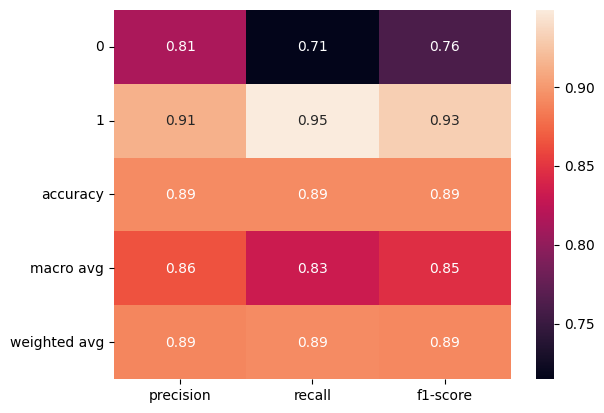

In [96]:
# we will plot heat map of the Classification Report
sns.heatmap(pd.DataFrame(classification_report(y_test, predicted, output_dict=True)).iloc[:-1, :].T, annot=True)

In [92]:
# we will predict new review msg
msg='Amazing Product. i would greatly recomend this' # new Review message
msg=cleaning(msg)
msg=remove_freq_words(msg)
msg=wordnet_lm.lemmatize(msg)
msg

'amazing product would greatly recomend'

In [93]:
msg=cv.transform([msg])
mnb.predict(msg)

array([1])

Yes we Our model classified this new review as Positive....